# Machine learning Coursera Ex 1 - Linear Regression

##  1.1 One Variable linear regression

### Load dataset

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [473]:
data1 = pd.read_csv('ex1data1.txt',index_col=False,header=None,names=['Population','Profit'])
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Plotting the Data

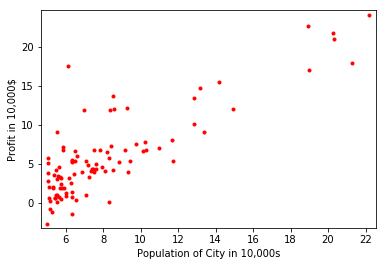

In [47]:
%matplotlib inline
plt.plot(data1['Population'],data1['Profit'],linestyle='None',marker='.',color='red')
plt.margins(0.02)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in 10,000$')
plt.show()


### Gradient Descent

#### implementation

In [544]:
X = np.c_[np.ones(data1.shape[0]),data1.iloc[:,0].as_matrix()]
y = np.c_[data1.iloc[:,1].as_matrix()]
theta = np.zeros(shape=(1,2)) #initialize fitting parameters
iterations = 1500;
alpha = 0.01;

#### Computing the cost J(*theta*) 

$$J(\theta)={\frac{1}{2m}} \sum(h_\theta(x^i)-y^i)^2 $$


In [545]:
def computeCost(X,y,theta):
    #COMPUTECOST Compute cost for linear regression#
    #computes the cost of using theta as the parameter for linear regression to fit the data points in X and y
    m = len(y) # number of training examples 
    J = np.sum(( X.dot(theta.T) - y)**2) * (1/(2*m))   #Cost function
    return J
    

#### Gradient Descent


$$ \theta_j :=\theta_j- \alpha\frac{1}{m} \sum(h_\theta(x^i)-y^i)x_j^i $$
(simultaneously update parameter (j) for all j)


In [546]:
def gradientDescent(X, y, theta, alpha, num_iters):
    #GRADIENTDESCENT Performs gradient descent to learn theta
    m = len(y)
    J_history = np.zeros(shape=(num_iters, 1))
    theta_vals = np.zeros(shape=(num_iters, 2))
    for i in range(num_iters):
        theta = theta - ((X.dot(theta.T) - y).T.dot(X))*(alpha/m)
        theta_vals[i] = theta
        J_history[i] = computeCost(X,y,theta)
        
    return theta,J_history,theta_vals
        
    


In [547]:
theta,J_history,theta_vals = gradientDescent(X, y, theta, alpha, iterations)

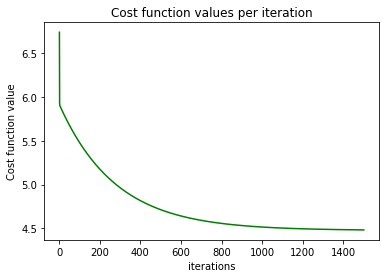

In [533]:
plt.plot(np.array(range(1,iterations+1)),b,color='green')
plt.xlabel('iterations')
plt.ylabel('Cost function value')
plt.title('Cost function values per iteration')
plt.show()

#### Prediction

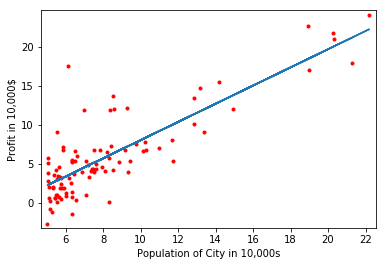

In [532]:
plt.plot(data1['Population'],data1['Profit'],linestyle='None',marker='.',color='red')
plt.plot(data1['Population'],X.dot(theta.T))
plt.margins(0.02)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in 10,000$')
plt.show()

In [529]:
#prediction for 35k population
prediction1 = np.c_[1,3.5].dot(theta.T)*10000
print(prediction1)

[[ 4519.7678677]]


In [530]:
#prediction for 70k population
prediction2 = np.c_[1,7].dot(theta.T)*10000
print(prediction2)

[[ 45342.45012945]]
